In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import f_oneway, ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_excel('/content/drive/MyDrive/Respirer Ass/cons_data_all_res.xlsx')
df

,Time,year,moy_date,doy_date,busday,season,dow_date,hour,month_name,temp,...,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
0,2017-01-01 00:00:00,2017,1,1,False,Winter,1,0,January,22.0,...,0.0821,0.0667,0.2131,0.0854,0.1277,0.2173,0.1478,0.1568,1.1462,0.2553
1,2017-01-01 01:00:00,2017,1,1,False,Winter,1,1,January,22.0,...,0.0989,0.1047,0.1719,0.0948,0.1112,0.2411,0.1597,0.4315,0.2193,0.5326
2,2017-01-01 02:00:00,2017,1,1,False,Winter,1,2,January,22.0,...,0.0990,0.1001,0.1865,0.0978,0.1850,0.8316,0.2118,1.4843,0.1563,0.3818
3,2017-01-01 03:00:00,2017,1,1,False,Winter,1,3,January,23.5,...,0.1038,0.1354,0.1882,0.1064,0.0970,0.6645,0.2361,1.3716,0.2327,0.3798
4,2017-01-01 04:00:00,2017,1,1,False,Winter,1,4,January,27.0,...,0.0780,0.3508,0.2092,0.2456,0.1374,1.9451,0.3902,0.2105,0.2395,0.5176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,2017,12,365,False,Winter,1,19,December,23.5,...,0.0447,0.0896,0.1475,0.0889,0.1258,0.1211,0.1620,0.1375,0.5079,0.1471
8756,2017-12-31 20:00:00,2017,12,365,False,Winter,1,20,December,24.0,...,0.0223,0.0584,0.1649,0.0883,0.1166,0.1056,0.1639,0.1367,0.1133,0.1921
8757,2017-12-31 21:00:00,2017,12,365,False,Winter,1,21,December,23.0,...,0.0521,0.1000,0.1887,0.0977,0.0997,0.1052,0.1642,0.1791,0.1159,0.1581
8758,2017-12-31 22:00:00,2017,12,365,False,Winter,1,22,December,22.0,...,0.0485,0.1067,0.1874,0.0950,0.1459,0.1232,0.1654,0.1425,0.4760,0.2320


In [23]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df

,year,moy_date,doy_date,busday,season,dow_date,hour,month_name,temp,humid,...,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017,1,1,False,Winter,1,0,January,22.0,71.010,...,0.0821,0.0667,0.2131,0.0854,0.1277,0.2173,0.1478,0.1568,1.1462,0.2553
2017-01-01 01:00:00,2017,1,1,False,Winter,1,1,January,22.0,71.010,...,0.0989,0.1047,0.1719,0.0948,0.1112,0.2411,0.1597,0.4315,0.2193,0.5326
2017-01-01 02:00:00,2017,1,1,False,Winter,1,2,January,22.0,68.750,...,0.0990,0.1001,0.1865,0.0978,0.1850,0.8316,0.2118,1.4843,0.1563,0.3818
2017-01-01 03:00:00,2017,1,1,False,Winter,1,3,January,23.5,58.895,...,0.1038,0.1354,0.1882,0.1064,0.0970,0.6645,0.2361,1.3716,0.2327,0.3798
2017-01-01 04:00:00,2017,1,1,False,Winter,1,4,January,27.0,44.800,...,0.0780,0.3508,0.2092,0.2456,0.1374,1.9451,0.3902,0.2105,0.2395,0.5176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,2017,12,365,False,Winter,1,19,December,23.5,51.730,...,0.0447,0.0896,0.1475,0.0889,0.1258,0.1211,0.1620,0.1375,0.5079,0.1471
2017-12-31 20:00:00,2017,12,365,False,Winter,1,20,December,24.0,48.575,...,0.0223,0.0584,0.1649,0.0883,0.1166,0.1056,0.1639,0.1367,0.1133,0.1921
2017-12-31 21:00:00,2017,12,365,False,Winter,1,21,December,23.0,58.775,...,0.0521,0.1000,0.1887,0.0977,0.0997,0.1052,0.1642,0.1791,0.1159,0.1581


In [24]:
# Statistical descriptions of sensors
sensor_cols = [f'r{i}' for i in range(1, 13)]
desc_stats = df[sensor_cols].describe()
print(desc_stats)

                r1           r2           r3           r4           r5  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.224942     0.228293     0.239121     0.270619     0.316176   
std       0.139805     0.196766     0.213277     0.202959     0.165605   
min       0.010500     0.004400     0.010800     0.006500     0.014500   
25%       0.147300     0.139575     0.127000     0.154600     0.219700   
50%       0.176850     0.183500     0.182600     0.214800     0.278900   
75%       0.257800     0.248600     0.255300     0.306300     0.357250   
max       1.919100     2.630000     2.451000     5.491000     2.342100   

                r6           r7           r8           r9          r10  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.335506     0.363074     0.447705     0.456057     0.456416   
std       0.295094     0.338699     0.319266     0.400453     0.406009   
min       0.058100     0.027100     0

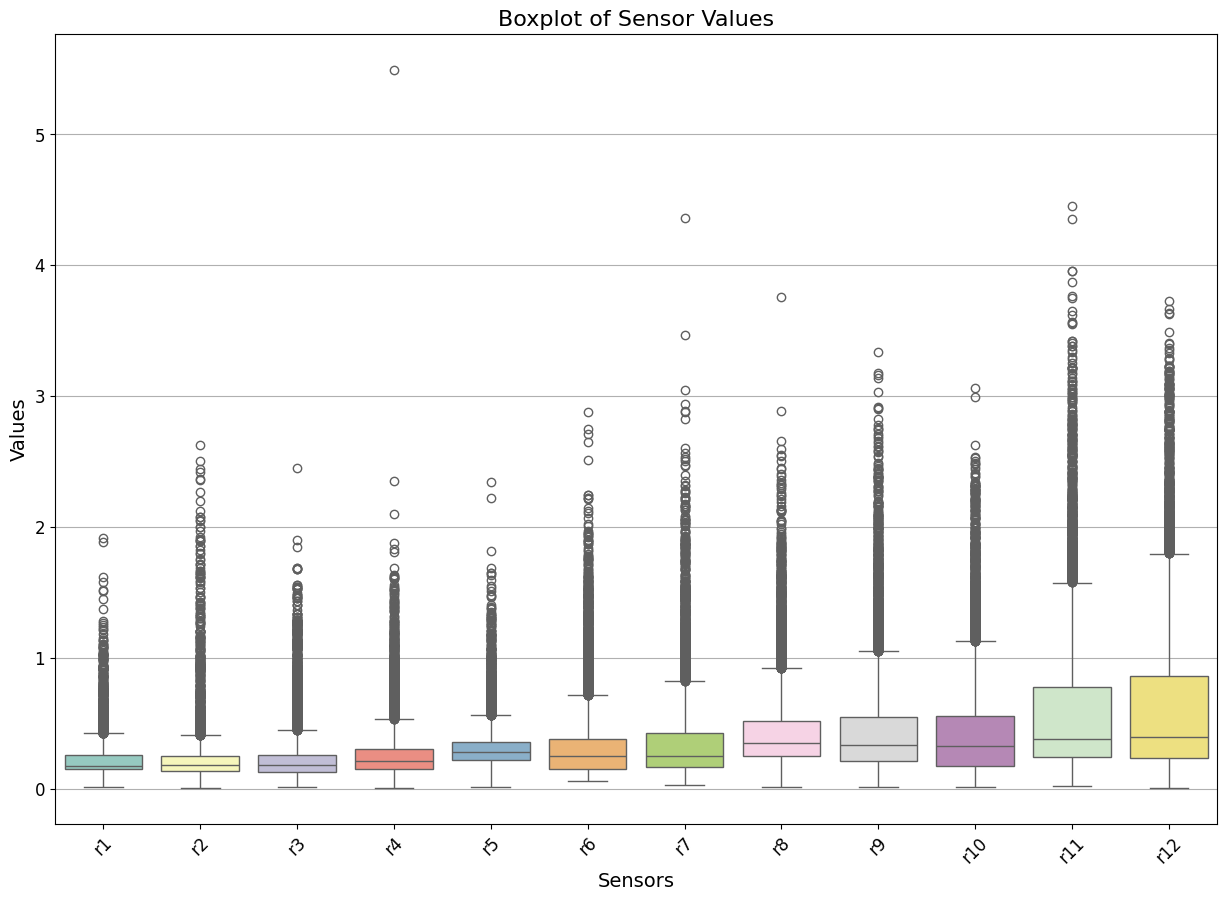

In [25]:
# Comparison of sensor values using boxplot with enhancements
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[sensor_cols], palette='Set3')
plt.title('Boxplot of Sensor Values', fontsize=16)
plt.xlabel('Sensors', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.subplots_adjust(top=0.9)
plt.show()


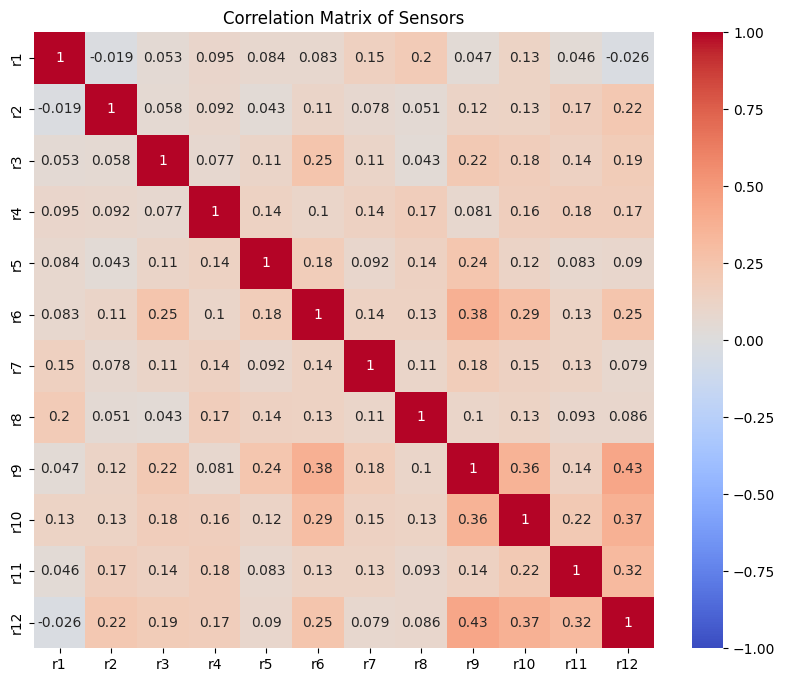

In [26]:
# Descriptive statistics - correlation matrix
corr_matrix = df[sensor_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Sensors')
plt.show()

In [27]:
# Inferential statistics - ANOVA and t-test
anova_result = f_oneway(*[df[col].dropna() for col in sensor_cols])
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 1425.8181662798609, p-value = 0.0


In [28]:
# For t-test, comparing means between each pair of sensors
ttest_results = {}
for i in range(len(sensor_cols)):
    for j in range(i + 1, len(sensor_cols)):
        t_stat, p_val = ttest_ind(df[sensor_cols[i]].dropna(), df[sensor_cols[j]].dropna())
        ttest_results[f'{sensor_cols[i]} vs {sensor_cols[j]}'] = (t_stat, p_val)


print("T-test results:")
for key, value in ttest_results.items():
    print(f"{key}: t-statistic = {value[0]}, p-value = {value[1]}")

T-test results:
r1 vs r2: t-statistic = -1.2994083824781233, p-value = 0.19382091638423468
r1 vs r3: t-statistic = -5.203895370412164, p-value = 1.973551399800105e-07
r1 vs r4: t-statistic = -17.346788051056656, p-value = 7.547956120066802e-67
r1 vs r5: t-statistic = -39.40006478692792, p-value = 0.0
r1 vs r6: t-statistic = -31.69065131641216, p-value = 2.2614681703004525e-214
r1 vs r7: t-statistic = -35.28321137747941, p-value = 1.6385318273746264e-263
r1 vs r8: t-statistic = -59.82030169340258, p-value = 0.0
r1 vs r9: t-statistic = -50.99821598192683, p-value = 0.0
r1 vs r10: t-statistic = -50.453027750305175, p-value = 0.0
r1 vs r11: t-statistic = -61.30999047964362, p-value = 0.0
r1 vs r12: t-statistic = -63.5304453832948, p-value = 0.0
r2 vs r3: t-statistic = -3.4924132683022022, p-value = 0.0004798567974738724
r2 vs r4: t-statistic = -14.013912958775077, p-value = 2.2253070885300844e-44
r2 vs r5: t-statistic = -31.98302201962667, p-value = 3.3826243253141017e-218
r2 vs r6: t-stat

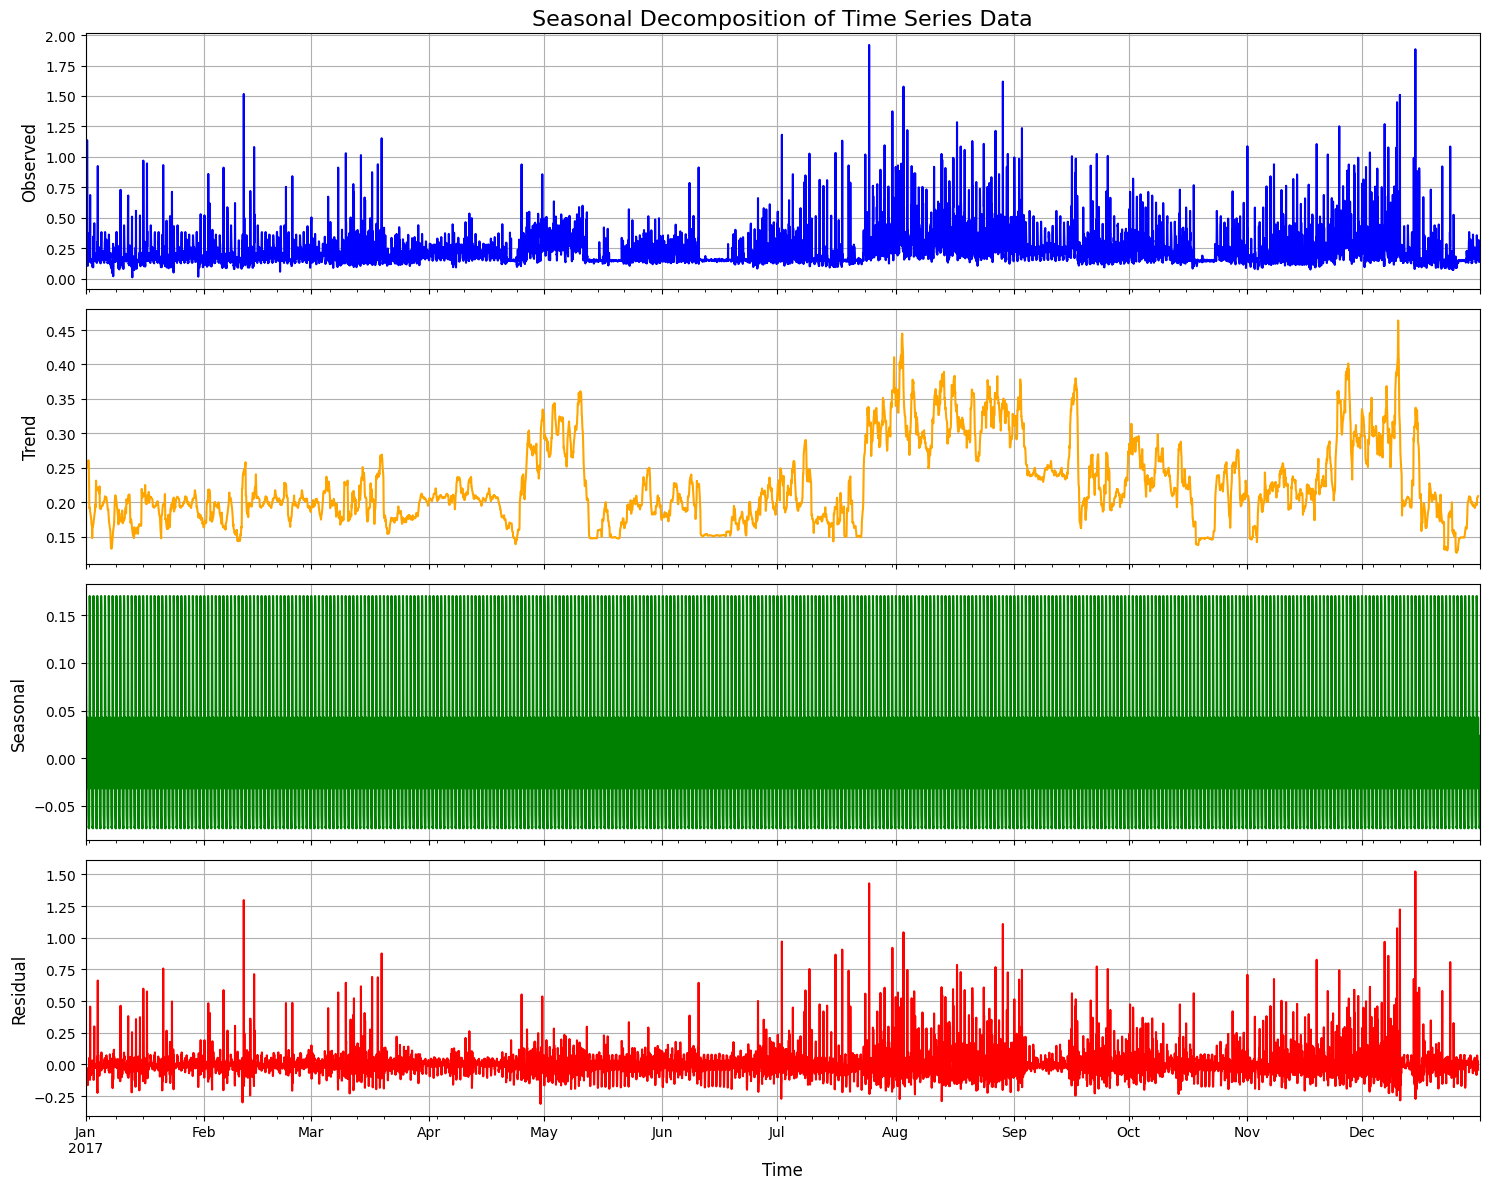

In [29]:
# Time series analysis - decomposition
sensor = 'r1'
result = seasonal_decompose(df[sensor].dropna(), model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

result.observed.plot(ax=ax1, color='blue')
ax1.set_ylabel('Observed', fontsize=12)
ax1.set_title('Seasonal Decomposition of Time Series Data', fontsize=16)
ax1.grid()

result.trend.plot(ax=ax2, color='orange')
ax2.set_ylabel('Trend', fontsize=12)
ax2.grid()

result.seasonal.plot(ax=ax3, color='green')
ax3.set_ylabel('Seasonal', fontsize=12)
ax3.grid()

result.resid.plot(ax=ax4, color='red')
ax4.set_ylabel('Residual', fontsize=12)
ax4.set_xlabel('Time', fontsize=12)
ax4.grid()

plt.tight_layout()
plt.show()
